# Advanced Modeling for Titanic Survival Prediction

After establishing a baseline understanding of the Titanic dataset through exploratory data analysis and initial predictive modeling, the next step involves applying advanced machine learning algorithms to enhance predictive performance and uncover deeper patterns in the data. Survival on the Titanic was influenced by a variety of interacting factors—such as passenger class, age, gender, and family connections—many of which are non-linear and not easily captured by simplistic models.

In this advanced modeling phase, we implement and compare the effectiveness of several powerful classification algorithms:

* **Logistic Regression**
* **Random Forest Classifier**
* **XGBoost Classifier**
* **Support Vector Machine (SVM)**

Each of these models brings unique strengths to the table. By comparing these models across evaluation metrics such as accuracy, precision, recall, and ROC-AUC, we aim to identify the most suitable approach for accurately predicting passenger survival. The outcome of this analysis will not only refine the predictive model but also provide insights into the critical factors that contributed to survival, shedding light on one of the most historically significant maritime disasters through the lens of modern data science.

# Import Libraries

In [1]:
# data structure and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# for saving and loading models
import pickle
import joblib
import datetime

# Load and Preapre Data for Modeling

## Load the dataset

In [2]:
#  read cleaned Titanic dataset
df = pd.read_csv("data/titanic_clean.csv")

In [3]:
df.head()

,survived,pclass,fare,alone,sex_male,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton
0,0,3,7.2500,False,True,True,False,False,True
1,1,1,71.2833,False,False,False,True,False,False
2,1,3,7.9250,True,False,False,True,False,True
3,1,1,53.1000,False,False,False,True,False,True
4,0,3,8.0500,True,True,True,False,False,True


## Split the dataset into input features (x) and target variable (y)

In [4]:
# inpurt features
x = df.drop(columns=['survived'], axis=1)

# target variable
y = df['survived']

In [5]:
# check features and target variable
print("Features:\n", x.head())
print()
print("\nTarget Variable:\n", y.head())

Features:
    pclass     fare  alone  sex_male  who_man  who_woman  \
0       3   7.2500  False      True     True      False   
1       1  71.2833  False     False    False       True   
2       3   7.9250   True     False    False       True   
3       1  53.1000  False     False    False       True   
4       3   8.0500   True      True     True      False   

   embark_town_Queenstown  embark_town_Southampton  
0                   False                     True  
1                   False                    False  
2                   False                     True  
3                   False                     True  
4                   False                     True  


Target Variable:
 0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


## Split the dataset into training and testing sets

In [6]:
# split data into training and testing sets (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

## Feature Scaling

In [7]:
# fit on training data and transform both train and test sets
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [8]:
# Restore column names to scaled DataFrames for clarity and consistency
x_train_scale = pd.DataFrame(x_train_scale, columns=x_train.columns)
x_test_scale = pd.DataFrame(x_test_scale, columns=x_test.columns)

# Logistic Regression Model

In [9]:
#  create empty Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

## Hyperparameter Optimization

In [10]:
# performing hyperparameter tuning using GridSearchCV
lr_param_grid = {
    'C' : [0.1, 1, 10, 100],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear', 'saga']
}

## Train Optimized Model

In [11]:
# Optimized model
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='accuracy', n_jobs=1)

# train and fit the grid search model
lr_grid_search.fit(x_train_scale, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=1,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l2', 'l1'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [12]:
# best model from gridsearch
lr_optimized_model = lr_grid_search.best_estimator_

## Make Predictions and Get Predicted Probabilities

In [13]:
#  make prediction with optimized model
lr_train_pred = lr_optimized_model.predict(x_train_scale)
lr_test_pred = lr_optimized_model.predict(x_test_scale)

In [14]:
# get predicted probabilities
lr_train_proba = lr_optimized_model.predict_proba(x_train_scale)[:, 1]
lr_test_proba = lr_optimized_model.predict_proba(x_test_scale)[:, 1]

## Calculate Evaluation Metrics

In [15]:
# Training Metrics
lr_train_acc = accuracy_score(y_train, lr_train_pred)           # accuracy score
lr_train_precision = precision_score(y_train, lr_train_pred)    # precision score
lr_train_recall = recall_score(y_train, lr_train_pred)          # recall score
lr_train_f1 = f1_score(y_train, lr_train_pred)                  # f1 score

In [16]:
#  testing metrics
lr_test_acc = accuracy_score(y_test, lr_test_pred)              # accuracy score
lr_test_precision = precision_score(y_test, lr_test_pred)       # precision score
lr_test_recall = recall_score(y_test, lr_test_pred)             # recall score
lr_test_f1 = f1_score(y_test, lr_test_pred)                     # f1 score

## ROC Curve and AUC

In [17]:
# roc curve for training and testing set
lr_train_fpr, lr_train_tpr, _ = roc_curve(y_train, lr_train_proba)
lr_test_fpr, lr_test_tpr, _ = roc_curve(y_test, lr_test_proba)

# calculate AUC for training and testing set
lr_train_auc = auc(lr_train_fpr, lr_train_tpr)
lr_test_auc = auc(lr_test_fpr, lr_test_tpr)

In [18]:
# summary of the metrics
print(f"=== Optimized Logistic Regression Results ===")

metrics = [
    ("Accuracy", lr_train_acc, lr_test_acc),
    ("Precision", lr_train_precision, lr_test_precision),
    ("Recall", lr_train_recall, lr_test_recall),
    ("F1-Score", lr_train_f1, lr_test_f1),
    ("AUC", lr_train_auc, lr_test_auc)
]

# Print header
print(f"{'Metric':<15}{'Training':<12}{'Test':<12}")
print("-" * 39)

# Print each row using a loop
for name, train_val, test_val in metrics:
    print(f"{name:<15}{train_val:<12.4f}{test_val:<12.4f}")

=== Optimized Logistic Regression Results ===
Metric         Training    Test        
---------------------------------------
Accuracy       0.7929      0.8022      
Precision      0.7217      0.7788      
Recall         0.7186      0.7297      
F1-Score       0.7202      0.7535      
AUC            0.8525      0.8690      


## Cross Validation

In [19]:
# cross-validation scores
lr_cv_score = cross_val_score(lr_optimized_model, x_train_scale, y_train, cv=5, scoring='accuracy')

# cv score result
print("=== Cross-Validation Result ===")
print("Cross-Validation Scores:")
print("\t".join([f"{score:.3f}" for score in lr_cv_score]))

print()
print(f"Mean Accuracy: {lr_cv_score.mean():.4f}")
print(f"Standard Deviation: {lr_cv_score.std():.4f}")

=== Cross-Validation Result ===
Cross-Validation Scores:
0.744	0.880	0.704	0.806	0.823

Mean Accuracy: 0.7914
Standard Deviation: 0.0615


### Feature Importance

In [20]:
# Feature Importance (coefficients)
feature_importance_lr = pd.DataFrame({
    'feature': x.columns,
    'coefficient': lr_optimized_model.coef_[0]
}).sort_values(by='coefficient', key=abs, ascending=False)

In [21]:
feature_importance_lr.head()

,feature,coefficient
4,who_man,-0.960539
0,pclass,-0.657539
3,sex_male,-0.215027
7,embark_town_Southampton,-0.187087
5,who_woman,0.037586


# Random Forest Model

In [22]:
# create empty random forest model
rf_model = RandomForestClassifier(random_state=42)

In [23]:
# hyperparameter tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

##  Create & Train Optimized Model

In [24]:
# Optimize random forest model
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# train and fit the model
rf_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [25]:
# best model from gridsearch
rf_optimized_model = rf_grid_search.best_estimator_

## Make prediction and Get Predicted Probabilities

In [26]:
# make prediction for training and testing set
rf_train_pred = rf_optimized_model.predict(x_train)
rf_test_pred = rf_optimized_model.predict(x_test)

In [27]:
# get predicted probabilities
rf_train_proba = rf_optimized_model.predict_proba(x_train)[:, 1]
rf_test_proba = rf_optimized_model.predict_proba(x_test)[:, 1]

## Calculate Evaluation Metrics

In [28]:
# training metrics
rf_train_acc = accuracy_score(y_train, rf_train_pred)           # accuracy score
rf_train_precision = precision_score(y_train, rf_train_pred)    # precision score
rf_train_recall = recall_score(y_train, rf_train_pred)          # recall score
rf_train_f1 = f1_score(y_train, rf_train_pred)                  # f1 score

In [29]:
# testing metrics
rf_test_acc = accuracy_score(y_test, rf_test_pred)              # accuracy score
rf_test_precision = precision_score(y_test, rf_test_pred)       # precision score
rf_test_recall = recall_score(y_test, rf_test_pred)             # recall score
rf_test_f1 = f1_score(y_test, rf_test_pred)                     # f1 score

## Roc Curve and AUC

In [30]:
# roc curve for training and test set
rf_train_fpr, rf_train_tpr, _ = roc_curve(y_train, rf_train_proba)
rf_test_fpr, rf_test_tpr, _ = roc_curve(y_test, rf_test_proba)

# calculate AUC for training and test set
rf_train_auc = auc(rf_train_fpr, rf_train_tpr)
rf_test_auc = auc(rf_test_fpr, rf_test_tpr)

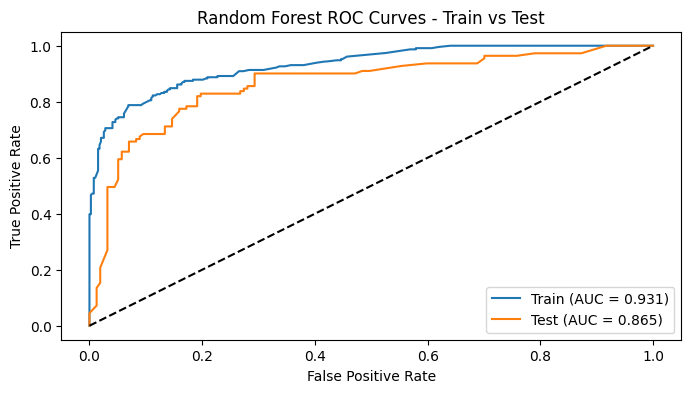

In [31]:
# figure size
plt.figure(figsize=(8, 4))

# ploting the curve
plt.plot(rf_train_fpr, rf_train_tpr, label=f'Train (AUC = {rf_train_auc:.3f})')
plt.plot(rf_test_fpr, rf_test_tpr, label=f'Test (AUC = {rf_test_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')

# set labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curves - Train vs Test')
plt.legend()

plt.show()

In [32]:
# summary of the metrics
print(f"=== Optimized Random Forest Results ===")

metrics = [
    ("Accuracy", rf_train_acc, rf_test_acc),
    ("Precision", rf_train_precision, rf_test_precision),
    ("Recall", rf_train_recall, rf_test_recall),
    ("F1 Score", rf_train_f1, rf_test_f1),
    ("AUC", rf_train_auc, rf_test_auc)
]

# Print header
print(f"{'Metric':<15}{'Training':<12}{'Test':<12}")
print("-" * 39)

# Print each row using a loop
for name, train_val, test_val in metrics:
    print(f"{name:<15}{train_val:<12.4f}{test_val:<12.4f}")

=== Optimized Random Forest Results ===
Metric         Training    Test        
---------------------------------------
Accuracy       0.8716      0.8060      
Precision      0.8953      0.8172      
Recall         0.7403      0.6847      
F1 Score       0.8104      0.7451      
AUC            0.9312      0.8646      


## Cross Validation

In [33]:
# cross validation scores
rf_cv_score = cross_val_score(rf_optimized_model, x_train, y_train, cv=5, scoring='accuracy')

# cv score result
print("=== Cross-Validation Result ===")
print("Cross-Validation Scores:")
print("\t".join([f"{score:.3f}" for score in rf_cv_score]))

print()
print(f"Mean Accuracy: {rf_cv_score.mean():.3f}")
print(f"Standard Deviation: {rf_cv_score.std():.3f}")

=== Cross-Validation Result ===
Cross-Validation Scores:
0.808	0.896	0.792	0.798	0.847

Mean Accuracy: 0.828
Standard Deviation: 0.039


## Feature Importance

In [34]:
# feature importance (coefficients)
feature_importance_rf = pd.DataFrame({
    'feature' : x_train.columns,
    'importance' : rf_optimized_model.feature_importances_
}).sort_values(by='importance', ascending=False)

# show importance
feature_importance_rf.head()

,feature,importance
1,fare,0.261348
4,who_man,0.197780
3,sex_male,0.177289
0,pclass,0.156254
5,who_woman,0.138108


# XGBoost Model

In [35]:
# create empty model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

In [36]:
# hyperparameter tuning
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
}

## Create and Train  Optimized Model

In [37]:
# optimized xgb model
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# train and fit the model
xgb_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, None],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.7, 1.0]},
             scoring='accuracy')

In [38]:
# best model from gridsearch
xgb_optimized_model = xgb_grid_search.best_estimator_

## Make prediction and Get Predicted Probabilities

In [39]:
# make predictions on train and test set
xgb_train_pred = xgb_optimized_model.predict(x_train)
xgb_test_pred = xgb_optimized_model.predict(x_test)

In [40]:
# get probabilities for training and test set
xgb_train_proba = xgb_optimized_model.predict_proba(x_train)[:, 1]
xgb_test_proba = xgb_optimized_model.predict_proba(x_test)[:, 1]

## Calculate Evaluation Metrics

In [41]:
# training metrics
xgb_train_acc = accuracy_score(y_train, xgb_train_pred)           # accuracy score
xgb_train_precision = precision_score(y_train, xgb_train_pred)    # precision score
xgb_train_recall = recall_score(y_train, xgb_train_pred)          # recall score
xgb_train_f1 = f1_score(y_train, xgb_train_pred)                  # f1 score

In [42]:
# testing metrics
xgb_test_acc = accuracy_score(y_test, xgb_test_pred)              # accuracy score
xgb_test_precision = precision_score(y_test, xgb_test_pred)       # precision score
xgb_test_recall = recall_score(y_test, xgb_test_pred)             # recall score
xgb_test_f1 = f1_score(y_test, xgb_test_pred)                     # f1 score

## ROC Curve and AUC

In [43]:
#  roc curv for training and test set
xgb_train_fpr, xgb_train_tpr, _ = roc_curve(y_train, xgb_train_proba)
xgb_test_fpr, xgb_test_tpr, _ = roc_curve(y_test,  xgb_test_proba)

# calculate AUC for training and test set
xgb_train_auc = auc(xgb_train_fpr, xgb_train_tpr)
xgb_test_auc = auc(xgb_test_fpr, xgb_test_tpr)

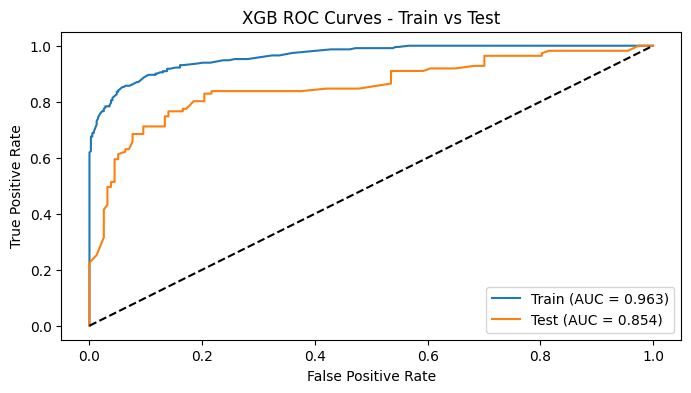

In [44]:
# figure size
plt.figure(figsize=(8, 4))

# plotting curve
plt.plot(xgb_train_fpr, xgb_train_tpr, label=f"Train (AUC = {xgb_train_auc:.3f})")
plt.plot(xgb_test_fpr, xgb_test_tpr, label=f"Test (AUC = {xgb_test_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')

# set labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB ROC Curves - Train vs Test')
plt.legend()

plt.show()

In [45]:
# summary of the metrics
print(f"=== Optimized Random Forest Results ===")

metrics = [
    ('Accuracy', xgb_train_acc, xgb_test_acc),
    ('Precision', xgb_train_precision, xgb_test_precision),
    ('Recall', xgb_train_recall, xgb_test_recall),
    ('F1 Score', xgb_train_f1, xgb_test_f1)
]

# print header
print(f"{'Metric':<15}{'Training':<12}{'Test':<12}")
print("-" * 39)

# print each row
for name, train_val, test_val in metrics:
    print(f"{name:<15}{train_val:<12.4f}{test_val:<12.4f}")

=== Optimized Random Forest Results ===
Metric         Training    Test        
---------------------------------------
Accuracy       0.9037      0.8134      
Precision      0.9254      0.7961      
Recall         0.8052      0.7387      
F1 Score       0.8611      0.7664      


## Cross Validation

In [46]:
# cross validation score
xgb_cv_score = cross_val_score(xgb_optimized_model, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# cv score result
print("=== Cross-Validation Result ===")
print("Cross-Validation Scores:")
print("\t".join((f"{score:.3f}" for score in xgb_cv_score)))

print()
print(f"Mean Accuracy: {xgb_cv_score.mean():.3f}")
print(f"Standard Deviation: {xgb_cv_score.std():.3f}")

=== Cross-Validation Result ===
Cross-Validation Scores:
0.808	0.904	0.808	0.847	0.847

Mean Accuracy: 0.843
Standard Deviation: 0.035


## Feature Importance

In [47]:
# feature importance
feature_importance_xgb = pd.DataFrame({
    'feature': x.columns,
    'importance': xgb_optimized_model.feature_importances_
}).sort_values(by='importance', ascending=False)

# shoe feature importance
feature_importance_xgb.head()

,feature,importance
4,who_man,0.474649
0,pclass,0.186953
3,sex_male,0.075551
1,fare,0.063876
7,embark_town_Southampton,0.063558


# SVM Model

In [48]:
# create empty model
svm_model = SVC(probability=True, random_state=42)

In [49]:
# Pipeline ensures scaling is applied before SVM
model_pipe = Pipeline([
    ('scaler', scaler),
    ('svm', svm_model)
])

# hyperparameter tuning 
svm_param_grid = [
    {
        # Linear kernel: use fewer C values
        'svm': [LinearSVC(random_state=42, max_iter=5000)],
        'svm__C': [0.1, 1, 10]
     },

     {
        # RBF kernel: reduced combinations
        'svm': [SVC(kernel='rbf', probability=True, random_state=42)],
        'svm__C': [0.1, 1, 10],
        'svm__gamma': ['scale', 0.1, 1]
     }
]

## Create and Train Optimized Model

In [50]:
# optimized SVM model
svm_grid_search = GridSearchCV(model_pipe, svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# train and fit model
svm_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm',
                                        SVC(probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid=[{'svm': [LinearSVC(max_iter=5000, random_state=42)],
                          'svm__C': [0.1, 1, 10]},
                         {'svm': [SVC(probability=True, random_state=42)],
                          'svm__C': [0.1, 1, 10],
                          'svm__gamma': ['scale', 0.1, 1]}],
             scoring='accuracy')

**NOTE:** Added preprocessing pipeline with StandardScaler, separated parameter grids for LinearSVC and RBF SVC, and streamlined hyperparameter tuning for efficiency.

In [51]:
# best model from gridsearch
svm_optimized_model = svm_grid_search.best_estimator_

## Make Prediction and Get Probabilities

In [52]:
# make prediction for training and test set
svm_train_pred = svm_optimized_model.predict(x_train)
svm_test_pred = svm_optimized_model.predict(x_test)

In [53]:
# get probabilities for training and test set
svm_train_proba = svm_optimized_model.predict_proba(x_train)[:, 1]
svm_test_proba = svm_optimized_model.predict_proba(x_test)[:, 1]

## Calculate Evaluation Metrics

In [54]:
# training metrics
svm_train_acc = accuracy_score(y_train, svm_train_pred)           # accuracy score
svm_train_precision = precision_score(y_train, svm_train_pred)    # precision score
svm_train_recall = recall_score(y_train, svm_train_pred)          # recall score
svm_train_f1 = f1_score(y_train, svm_train_pred)                  # f1 score

In [55]:
# test metrics
svm_test_acc = accuracy_score(y_test, svm_test_pred)           # accuracy score
svm_test_precision = precision_score(y_test, svm_test_pred)    # precision score
svm_test_recall = recall_score(y_test, svm_test_pred)          # recall score
svm_test_f1 = f1_score(y_test, svm_test_pred)                  # f1 score


## ROC Curve and AUC

In [56]:
# roc curve for train and test set
svm_train_fpr, svm_train_tpr, _ = roc_curve(y_train, svm_train_proba)
svm_test_fpr, svm_test_tpr, _ = roc_curve(y_test, svm_test_proba)

# calculate AUC for training and test set
svm_train_auc = auc(svm_train_fpr, svm_train_tpr)
svm_test_auv = auc(svm_test_fpr, svm_test_tpr)

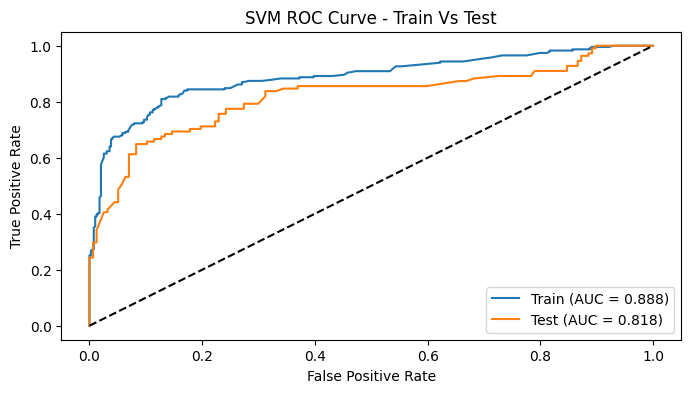

In [57]:
# figure size
plt.figure(figsize=(8, 4))

# plotting curve
plt.plot(svm_train_fpr, svm_train_tpr, label=f'Train (AUC = {svm_train_auc:.3f})')
plt.plot(svm_test_fpr, svm_test_tpr, label=f'Test (AUC = {svm_test_auv:.3f})')
plt.plot([0, 1], [0, 1], 'k--')

# set labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve - Train Vs Test")
plt.legend()
plt.show()